In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import gc
import re

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

In [2]:
%%time
# Load BES Panel for Wave 8
parsed_data = pd.read_pickle("man_of_2017_parsed.pkl")
#(31409, 733)

# BES_Panel = pd.read_stata("../BES_analysis_data/BES2015_W8_v1.6.dta")

print( parsed_data.shape )

(313, 83)
Wall time: 12 ms


In [3]:
discrete_only = pd.DataFrame()
for col in parsed_data.columns:
    # drop object and datetime64[ns] silently
    if str( parsed_data[col].dtype ) == 'category':
        discrete_only[col] = parsed_data[col].cat.codes.astype('float')
    elif ( str( parsed_data[col].dtypes ) == 'bool'):
        discrete_only[col] = parsed_data[col].astype('float')
    elif ( str( parsed_data[col].dtypes ) == 'int64' ):
        discrete_only[col] = (parsed_data[col]>0).astype('float')
        

In [4]:
discrete_only.to_stata("man2017_discrete.dta")

In [5]:
strengths = pd.read_csv("strengths_discrete2017man.csv")
str_df = strengths.drop('Unnamed: 0',axis=1).sort_values(by="strength")

In [6]:
str_df

,from,to,strength
0,does_not_trouble_others_with,keeps_his_feelings_to_himself,-50.230709
317,makes_the_first_move_sexually,takes_the_lead_in_bed,-33.889476
2,puts_the_lives_of_others_over,puts_the_needs_and_feelings_of,-31.959252
1,is_financially_independent,is_able_to_provide_financially,-30.401168
8,shows_sportsmanship_and_does,helps_other_men_to_be_good_men,-24.584942
321,is_ready_to_use_physical_force,may_take_a_beating_of_whatever,-24.503627
38,has_a_penis,conservative,-19.593887
6,puts_his_bonds_with_other_men,does_man_s_work_and_lets_women,-18.712821
7,may_take_a_beating_of_whatever,maintains_his_physical_strength,-15.963082
42,helps_other_men_to_be_good_men,channels_his_anger_and,-14.513846


In [7]:
import plotly.plotly as py
from plotly.graph_objs import *
import networkx as nx

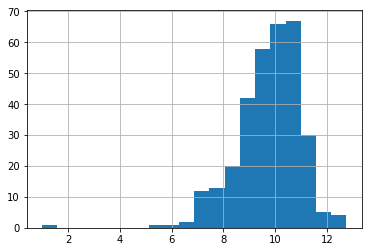

In [8]:
log_positive_str = np.log(np.abs(str_df["strength"]))
log_positive_str = log_positive_str - min(log_positive_str) +1
log_positive_str.hist(bins=20)

In [14]:
G = nx.DiGraph( )
for i in str_df.index:
    if log_positive_str.loc[i] > 11: # filter weak links
        G.add_node( str_df.loc[i]["from"] )
        G.add_node( str_df.loc[i]["to"]   )
        G.add_edge( str_df.loc[i]["from"] , str_df.loc[i]["to"] , weight=log_positive_str.loc[i] )

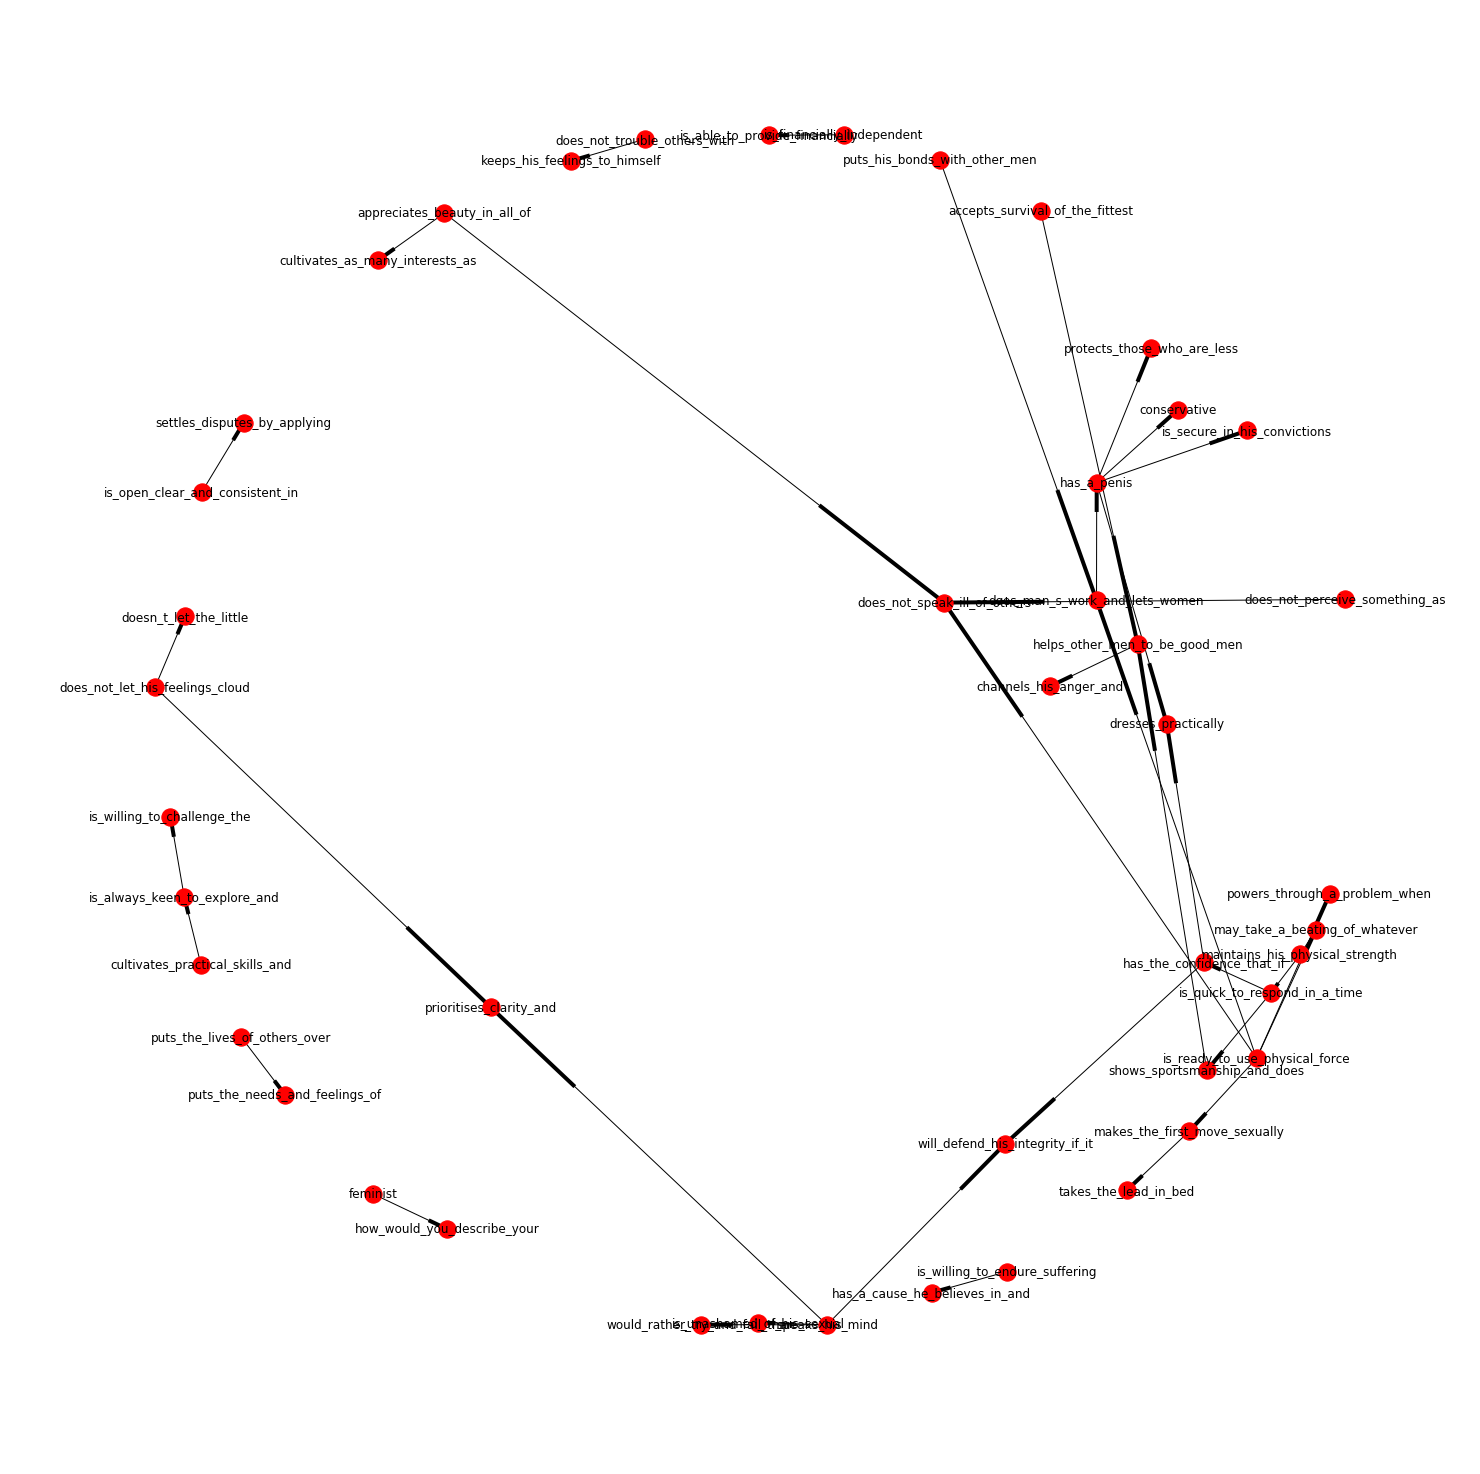

In [15]:
plt.figure(figsize=(20,20));
pos=nx.spring_layout(G,weight='weight')
nx.draw(G,pos, with_labels=True)

In [16]:
import json
from networkx.readwrite import json_graph

for n in G:
    G.node[n]['name'] = n

d = json_graph.node_link_data(G)
json.dump(d, open('man-force/force.json','w'))

In [17]:
# helper to load url
# runs webserver and loads url with webbrowswer module
import sys

def load_url(path):
    PORT = 8001
    httpd = StoppableHTTPServer(("127.0.0.1",PORT), handler)
    thread.start_new_thread(httpd.serve, ())
    webbrowser.open_new('http://localhost:%s/%s'%(PORT,path))
    input("Press <RETURN> to stop server\n")
    httpd.stop()
    print("To restart server run: \n%s"%server)


if sys.version_info[0] == 2:
    import SimpleHTTPServer, BaseHTTPServer
    import socket
    import thread
    import webbrowser
    handler = SimpleHTTPServer.SimpleHTTPRequestHandler
    input = raw_input
    server = "python -m SimpleHTTPServer 8000"

    class StoppableHTTPServer(BaseHTTPServer.HTTPServer):

        def server_bind(self):
            BaseHTTPServer.HTTPServer.server_bind(self)
            self.socket.settimeout(1)
            self.run = True

        def get_request(self):
            while self.run:
                try:
                    sock, addr = self.socket.accept()
                    sock.settimeout(None)
                    return (sock, addr)
                except socket.timeout:
                    pass

        def stop(self):
            self.run = False

        def serve(self):
            while self.run:
                self.handle_request()


else:
    import http.server, http.server
    import socket
    import _thread as thread
    import webbrowser
    handler = http.server.SimpleHTTPRequestHandler
    server = "python -m http.server 8000"

    class StoppableHTTPServer(http.server.HTTPServer):

        def server_bind(self):
            http.server.HTTPServer.server_bind(self)
            self.socket.settimeout(1)
            self.run = True

        def get_request(self):
            while self.run:
                try:
                    sock, addr = self.socket.accept()
                    sock.settimeout(None)
                    return (sock, addr)
                except socket.timeout:
                    pass

        def stop(self):
            self.run = False

        def serve(self):
            while self.run:
                self.handle_request()

In [ ]:
load_url('man-force/force.html')

127.0.0.1 - - [02/Jan/2017 21:04:10] "GET /man-force/force.json HTTP/1.1" 200 -


In [32]:
import os
cwd = os.getcwd()

In [33]:
cwd


'C:\\Users\\Marios\\Desktop\\The Man of 2017\\man_2017_code'